In [6]:
import os

import torch
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import shutil

import random

import sorter_settings

cwd = os.getcwd()

if torch.cuda.is_available():
    reader = easyocr.Reader(['en'], gpu=True)
    print(f"GPU in use: {torch.cuda.get_device_name(0)}")

else:
    reader = easyocr.Reader(['en'], gpu=False)
    print("using CPU, CUDA not available")

Using CPU. Note: This module is much faster with a GPU.


using CPU, CUDA not available


final length: 1


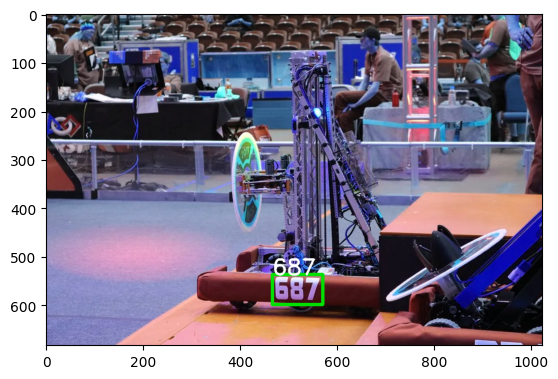

In [3]:
#Set image here
IMAGE_PATH = (f"{cwd}\image_library\\687_7.webp")
result = reader.readtext(IMAGE_PATH)

#Initiate list for result collection
bottom_right_list = list()
top_left_list = list()
index_list = list()
answer_list = list()

img = cv2.imread(IMAGE_PATH)

#Print results
if not result:
    print("Empty Results List")
else:
    for index, item in enumerate(result):
        if result[index][1].isdigit():
            bottom_right_list.append(tuple(result[index][0][2]))
            top_left_list.append(tuple(result[index][0][0]))
            answer_list.append(result[index][1])
        else:
            print(f"discarding: {result[index][1]}")
        
        #Display Settings
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        #Add labels
        for idx, answer in enumerate(answer_list):
            img = cv2.rectangle(img, tuple(map(int, top_left_list[idx])), tuple(map(int, bottom_right_list[idx])), (0, 225, 0), 5)
            img = cv2.putText(img, answer_list[idx], tuple(map(int, top_left_list[idx])), font, 1.5, (255, 255, 255), 3)

#Display image
print(f"final length: {len(answer_list)}")
plt.imshow(img)
plt.show()

In [16]:
string_test = '488_10.webp'
string_test.startswith(f"{str(48)}_")

False

In [7]:
comp_roster = os.listdir(f"{cwd}\\{sorter_settings.sorted_destination}\\")
print(str(result[index][1]).replace(' ', '').isdigit() and str(result[index][1]).replace(' ','') in comp_roster)

False


In [9]:
str(result[index][1]).replace(' ','') in comp_roster

False

In [12]:
comp_roster

['1073',
 '1294',
 '135',
 '1599',
 '166',
 '2062',
 '2333',
 '3180',
 '348',
 '3673',
 '3674',
 '3986',
 '4239',
 '4638',
 '4905',
 '4915',
 '5024',
 '5050',
 '5279',
 '5632',
 '5641',
 '587',
 '6180',
 '6706',
 '68',
 '6827',
 '7200',
 '7225',
 '7274',
 '746',
 '8116',
 '815',
 '8736',
 '8891',
 '968']

In [2]:
#ROSTER GENERATOR & FOLDER RESETTER

#Number of competitors
comp_num = 35
comp_roster = list()
file_list = os.listdir(f"{cwd}\image_library\\")

for x in range(comp_num):
    valid_team = False
    while not valid_team:
        team = random.randint(1, 9785)
        if team in comp_roster:
            valid_team = False
        else:
            for file in file_list:
                if file.startswith(str(team) + "_"):
                    valid_team = True
                    comp_roster.append(team)
                    break
                else:
                    valid_team = False

print("Generated new roster!")

# Clear files in unsorted folder
unsorted_files = os.listdir(f"{cwd}\\unsorted_demo\\")
if len(unsorted_files) > 0:
    for filename in unsorted_files:
        file_path = os.path.join(f"{cwd}\\unsorted_demo\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'unsorted files'")
else:
    print("No files removed for unsorted files: Length = 0")

# Clear files from sorted folder
sorted_files = os.listdir(f"{cwd}\\sorted_teams\\")
if len(sorted_files) > 0:
    for filename in sorted_files:
        file_path = os.path.join(f"{cwd}\\sorted_teams\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'sorted files'")
else:
    print("No files removed for sorted folder: Length = 0")

# Clear files from unidentifiable folder
unidentifiable_files = os.listdir(f"{cwd}\\unidentifiable_demo\\")
if len(unidentifiable_files) > 0:
    for filename in unidentifiable_files:
        file_path = os.path.join(f"{cwd}\\unidentifiable_demo\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'unidentifiable'")
else:
    print("No files removed for unidentifiable folder: Length = 0")

for team in comp_roster:
    Path(f"{cwd}/sorted_teams/{str(team)}").mkdir(parents=True, exist_ok=True)
    print(f"Created folder for {team}")


# MANAGES SETTING UP AND MOVING IMAGES
selected_file_list = list()

for team in comp_roster:
    for file in file_list:
        if file.startswith(f"{str(team)}"):
            selected_file_list.append(file)

for file in selected_file_list:
    shutil.copy(f"{cwd}\image_library\\{file}", f"{cwd}\\unsorted_demo\\")

Generated new roster!
No files removed for unsorted files: Length = 0
Successfully cleared folder 'sorted files'
Successfully cleared folder 'unidentifiable'
Created folder for 2051
Created folder for 948
Created folder for 2399
Created folder for 329
Created folder for 5509
Created folder for 133
Created folder for 5740
Created folder for 4499
Created folder for 5619
Created folder for 79
Created folder for 4296
Created folder for 2022
Created folder for 8362
Created folder for 8623
Created folder for 5857
Created folder for 5464
Created folder for 6098
Created folder for 2998
Created folder for 2357
Created folder for 4678
Created folder for 5229
Created folder for 6078
Created folder for 1038
Created folder for 2935
Created folder for 5847
Created folder for 3316
Created folder for 5142
Created folder for 1665
Created folder for 4643
Created folder for 4994
Created folder for 1369
Created folder for 1629
Created folder for 900
Created folder for 4913
Created folder for 1994


In [3]:
unsorted_files_list = os.listdir(f"{cwd}\\unsorted_demo\\")
for file in unsorted_files_list:

    WORKING_IMAGE_PATH = (f"{cwd}\\unsorted_demo\\{file}")
    result = reader.readtext(WORKING_IMAGE_PATH)
    
    #Initiate list for result collection
    answer_list = list()
    
    img = cv2.imread(WORKING_IMAGE_PATH)
    
    #Print results
    if not result:
        print("Empty Results List")
        shutil.copy(f"{cwd}\\unsorted_demo\\{file}", f"{cwd}\\unidentifiable_demo\\{file}")
    else:
        sorted_status = False
        for index, item in enumerate(result):
            if result[index][1].isdigit() and int(result[index][1]) in comp_roster:
                answer_list.append(result[index][1])
                shutil.copy(f"{cwd}\\unsorted_demo\\{file}", f"{cwd}\\sorted_teams\\{int(result[index][1])}\\{file}")
                sorted_status = True
            else:
                print(f"discarding: {result[index][1]}")

        if not sorted_status:
            shutil.copy(f"{cwd}\\unsorted_demo\\{file}", f"{cwd}\\unidentifiable_demo\\{file}")

print("Finished sorting!")

# Clear files in unsorted folder
unsorted_files = os.listdir(f"{cwd}\\unsorted_demo\\")
if len(unsorted_files) > 0:
    for filename in unsorted_files:
        file_path = os.path.join(f"{cwd}\\unsorted_demo\\", filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
    print("Successfully cleared folder 'unsorted files'")
else:
    print("No files removed for unsorted files: Length = 0")

discarding: Mkoe
discarding: WWpo
discarding: 10
discarding: 138
discarding: Ja"elin
discarding: 13
discarding: SEMENS
discarding: CKD
discarding: 1334
discarding: 7291
discarding: CKD
discarding: 1334
discarding: 1334
discarding: 13
discarding: 1334
discarding: 15
discarding: 5032
discarding: 1334
discarding: 0934
discarding: R
discarding: legle
discarding: Aibolics
discarding: Igle
discarding: Feam
discarding: RT
discarding: (TS
discarding: Josiah Plumme
discarding: Waterjet LLC
discarding: Majotta Real Estate .
discarding: J <
discarding: Bakker
discarding: 13
discarding: nny
discarding: Therera
discarding: easyc
discarding: all
discarding: FRC
discarding: Db=
discarding: [133
discarding: 2019
discarding: FRST DisirICT
discarding: 20
discarding: Winetaee
discarding: NEFIRS
discarding: EVENT
discarding: NORTH
discarding: VBX
discarding: EvE
discarding: ^93
discarding: DAnnuAs
discarding: 6
discarding: 733
discarding: SaD
discarding: 423
discarding: FIRST
discarding: Ne4
discarding: D

In [28]:
# Evaluate Correct

sfll = os.listdir(f"{cwd}\\sorted_teams\\")
c_counter = 0
for folder in sfll:
    ifile_list = os.listdir(f"{cwd}\\sorted_teams\\{folder}")
    for file in ifile_list:
        if len(ifile_list) > 0:
            if file.partition('_')[0] == folder:
                c_counter += 1

In [31]:
# Results

atr = (len(unsorted_files)-len(os.listdir(f"{cwd}\\unidentifiable_demo\\")))/len(unsorted_files)
overall_acc = (c_counter/len(unsorted_files))
car = overall_acc/atr
print(f"Attempted rate: {atr}")
print(f"Correct attempted: {car}")
print(f"Overall Correct: {overall_acc}")

0.6583333333333333